Download von Niederschlagsdaten und anderen Wetterdaten in Deutschland ist über das Climate Data Center [CDC](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/) des Deutschen Wetterdienstes möglich.

[Stationsliste](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/historical/RR_Tageswerte_Beschreibung_Stationen.txt)

Wir nutzen im Folgenden die Wetterdaten der Station Potsdam (Telegrafenberg)mit der Stationsnummer 03987.

Download:
- [Tageswerte](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/historical/tageswerte_RR_03987_18930101_20221231_hist.zip)
- [Monatswerte](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/more_precip/historical/monatswerte_RR_03987_18930101_20211231_hist.zip)
- [Jahreswerte](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/more_precip/historical/jahreswerte_RR_03987_18930101_20211231_hist.zip)

In diesem Skript nutzen wir ein weiteres sehr nützliches Python-Paket: `Pandas`. Das Paket ermöglicht die Arbeit mit Dataframes, welche Daten verschiedener Datentypen in einer 2 dimensionalen Tabelle mit Zeilen und Spalten enthalten kann. Pandas baut dabei auf numerischen Berechnungen von `NumPy` auf und erweitert diese um vielen nützliche Funktionen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8] # setzt die automatische Größe der Abbildungen in der Ausgabe fest

In [2]:

# pd.read_csv liest die Datei ein. Der Separator wird hier manuell auf Semikolon gesetzt. Der Pfad wurde hier relativ zum Ort des Skriptes gesetzt:
data_day = pd.read_csv("data/tageswerte_RR_03987_18930101_20221231_hist/produkt_nieder_tag_18930101_20221231_03987.txt",
            sep = ";")
# der index wird hier neu gesetzt mit type datetime: 
data_day.index = pd.to_datetime(data_day.MESS_DATUM,format="%Y%m%d")

In [3]:
# head zeigt nur die obersten Zeilen des Dataframes an und ermöglicht so einen ersten Blick auf den Dataframe:
print(data_day.head)

<bound method NDFrame.head of             STATIONS_ID  MESS_DATUM  QN_6    RS   RSF  SH_TAG  NSH_TAG  eor
MESS_DATUM                                                                 
1893-01-01         3987    18930101     5   0.0     0       7     -999  eor
1893-01-02         3987    18930102     5   0.1     1       7     -999  eor
1893-01-03         3987    18930103     5   3.2     1       6     -999  eor
1893-01-04         3987    18930104     5   1.7     1       9     -999  eor
1893-01-05         3987    18930105     5   0.0     0      11     -999  eor
...                 ...         ...   ...   ...   ...     ...      ...  ...
2022-12-27         3987    20221227     3   0.0     6       0     -999  eor
2022-12-28         3987    20221228     3   1.1     6       0     -999  eor
2022-12-29         3987    20221229     3   1.5     6       0     -999  eor
2022-12-30         3987    20221230     3   1.5     6       0     -999  eor
2022-12-31         3987    20221231     3   0.0     6     

In [4]:
print(data_day.columns) # hier werden die Spaltennamen angezeigt

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_6', '  RS', ' RSF', 'SH_TAG',
       'NSH_TAG', 'eor'],
      dtype='object')


Im nächsten Schritt werden die Tagesdaten als Zeitreihe geplottet:

In [5]:
data_day['  RS'].plot()


<AxesSubplot:xlabel='MESS_DATUM'>

In [38]:

data_month = pd.read_csv("data/monatswerte_RR_03987_18930101_20211231_hist/produkt_nieder_monat_18930101_20211231_03987.txt",
            sep = ";")
data_month.index = pd.to_datetime(data_month.MESS_DATUM_BEGINN,format="%Y%m%d")


In [7]:
data_month["MO_RR"].plot()

<AxesSubplot:>

In [8]:

data_year = pd.read_csv("data/jahreswerte_RR_03987_18930101_20211231_hist/produkt_nieder_jahr_18930101_20211231_03987.txt",
            sep = ";")

data_year.index = pd.to_datetime(data_year.MESS_DATUM_BEGINN,format="%Y%m%d")

<AxesSubplot:xlabel='MESS_DATUM_BEGINN'>

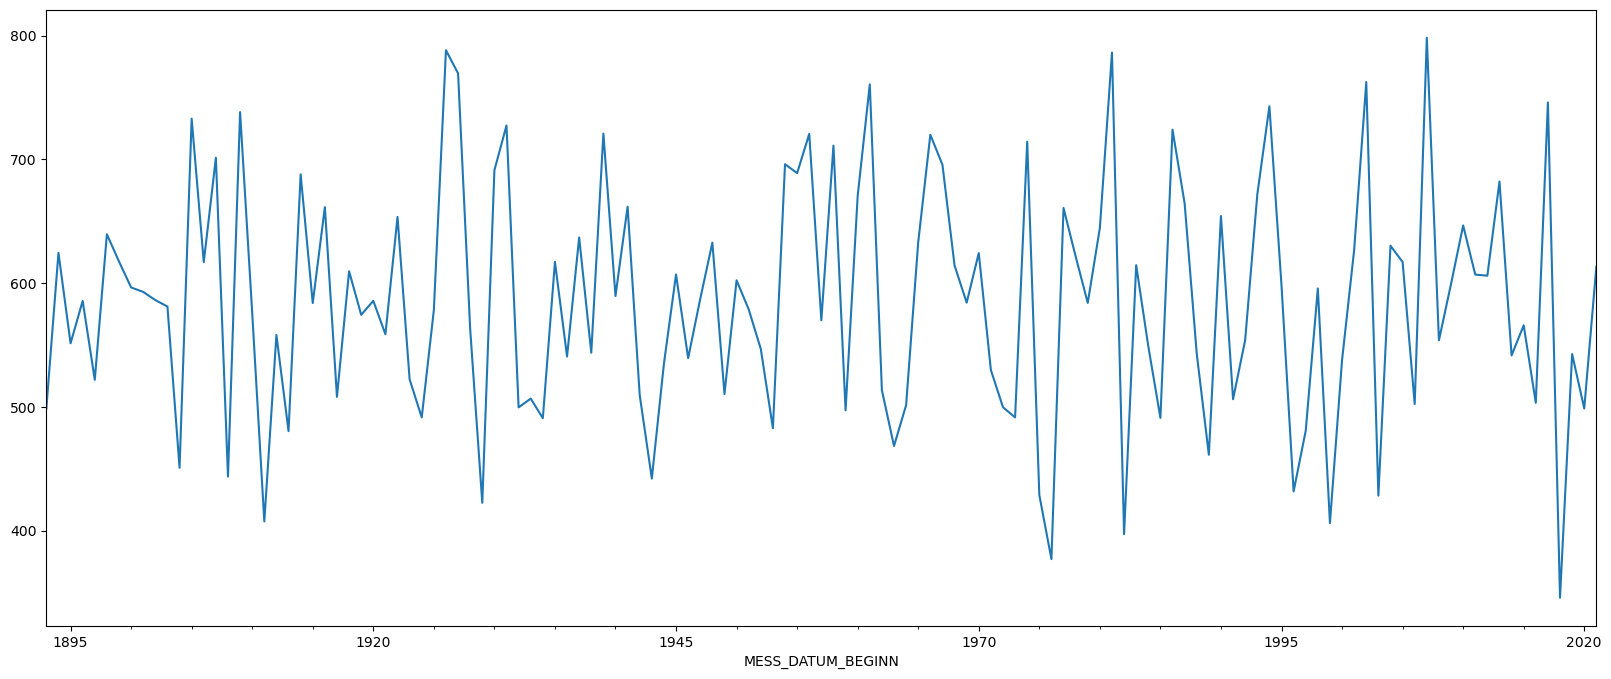

In [9]:
# Plot als Zeitreihe:
data_year["JA_RR"].plot()

Mittels Histogramme können die Häufigkeitsverteilungen der Tages, Monats und Jahresniederschläge dargestellt und verglichen werden:

In [10]:
fig, axs = plt.subplots(1,3) # die Subplot Funktion ermöglicht die Darstellung mehrerer Plots in einer Figure.

data_day["  RS"].plot.hist(ax = axs[0],bins=100)
axs[0].set_title("Tagesniederschlag")
axs[0].set_xlabel("mm/Tag")
data_month["MO_RR"].plot.hist(ax = axs[1],bins=20)
axs[1].set_title("Monatsniederschlag")
axs[1].set_xlabel("mm/Monat")
data_year["JA_RR"].plot.hist(ax = axs[2],bins=10)
axs[2].set_title("Jahresniederschlag")
axs[2].set_xlabel("mm/Jahr")

Text(0.5, 0, 'mm/Jahr')

**Zusatz:**

Die Jahresdaten können mit Python auch direkt aus den Tagesdaten berechnet werden. Allerdings muss dabei gesondert darauf geachtet werden, wie mit Fehlwerten in den Zeitreihen umgegangen wird, welche das Ergebnis verfälschen können.


In [11]:

data_year_man = data_day['  RS'].groupby(data_day.index.year).sum()
data_year_man.plot.bar()

<AxesSubplot:xlabel='MESS_DATUM'>

Zur Übersicht werden die Daten neu als CSV Dateien mit einer Spalte geschrieben:

In [40]:
data_day["  RS"].rename("P").to_csv("data/niederschlag_tageswerte.csv")

In [41]:
data_month["MO_RR"].rename("P").to_csv("data/niederschlag_monatswerte.csv")

In [39]:
data_year["JA_RR"].rename("P").to_csv("data/niederschlag_jahreswerte.csv")